# Exploring Why Civil Resistance Works

In this assignment, you will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

Following the initial publication of the book in 2011, Erica Chenoweth continued her research on the topic and published a follow-up ten years later, [Civil Resistance: What Everyone Needs to Know](https://www.ericachenoweth.com/research/civil-resistance-what-everyone-needs-to-know). She has also continued to update the data used for her research.

The research became famous for propising the 3.5% rule: "the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event"; you can find a nice overview at [Questions, Answers, and Some Cautionary
Updates Regarding the 3.5% Rule](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf). Among other things, you will investigate that rule.

To answer the questions, you will use that data, the [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX). You will also use data from the [Polity Project](https://www.systemicpeace.org/polityproject.html), in particular the Polity5 version, available from [Integrated Network for Societal Conflict Research (INSCR) ](https://www.systemicpeace.org/inscrdata.html), in particular the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls).

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

Student ID:
>Anna Chatzipapadopoulou
>Department of Informatics
>AM: p3200219
>p3200219@aueb.gr

## 1. Exploration of Historical Trends

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

Your plot should look like the following:

<img src="fig_1.svg"/>

In [67]:
pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [146]:
pip install xlrd

69977.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pandas statsmodels matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 4.1 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for patsy>=0.5.2 from https://files.pythonhosted.org/packages/29/ab/373449d6f741732f94e2d15d116a90f050b2857cb727b26d2f7bead50815/patsy-0.5.4-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 5.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import statsmodels.formula.api as smf
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
import statsmodels.api as sm

file_path = 'NAVCO-1.2-Updated.xlsx'
file_path5 = 'p5v2018.xls'

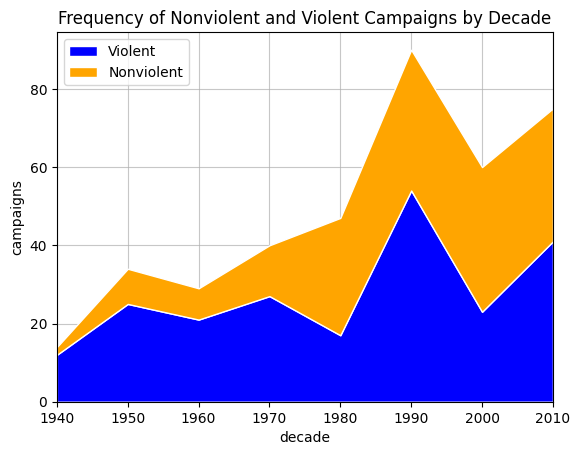

In [168]:
# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Create a new column for decades
df['Decade'] = (df['EYEAR'] // 10) * 10

# Convert 'VIOL' 
df['VIOL'] = df['VIOL'].astype('category')


grouped_data = df.groupby(['Decade', 'NONVIOL']).size().unstack(fill_value=0)

ax = plt.subplot()

ax.fill_between(grouped_data.index, 0, grouped_data[0], label='violent', color='blue', edgecolor='white', linewidth=1)


ax.fill_between(grouped_data.index, grouped_data[0], grouped_data[1] + grouped_data[0], label='NonViolent', color='orange', edgecolor='white', linewidth=1)

#grid lines for specific areas
ax.set_axisbelow(True)
ax.grid(True, linestyle='-', alpha=0.7)


ax.patch.set_facecolor('white')


ax.set_xlim(right=2010) 
ax.set_xlim(left=1940)

ax.set_ylim(bottom=0)


handles, _ = ax.get_legend_handles_labels()

legend_labels_dict = {0: 'Violent', 1: 'Nonviolent'}
legend_labels = [legend_labels_dict[label] for label in df['VIOL'].cat.categories]

plt.legend(handles, legend_labels, loc='upper left')
plt.title('Frequency of Nonviolent and Violent Campaigns by Decade')
plt.xlabel('decade')
plt.ylabel('campaigns')
plt.show()


Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics, and it should look like this:

<img src="fig_2.svg"/>

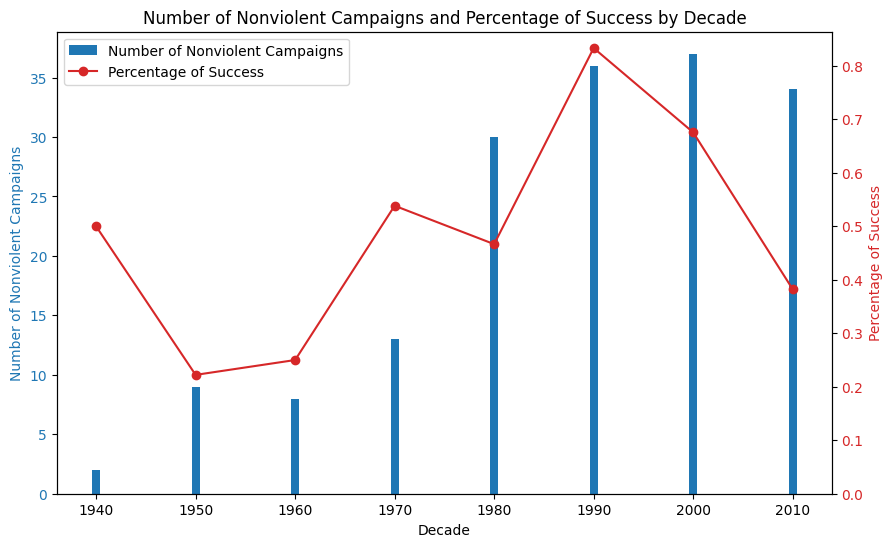

In [173]:

df = pd.read_excel(file_path)

# Convert 'EYEAR' to a decade format
df['Decade'] = (df['EYEAR'] // 10) * 10


grouped_data = df[df['VIOL'] == 0].groupby('Decade').agg({'VIOL': 'count', 'SUCCESS': 'mean'}).reset_index()

# Create a figure and two axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for the number of nonviolent campaigns on the left y-axis (ax1)
color = 'tab:blue'
ax1.set_xlabel('Decade')
ax1.set_ylabel('Number of Nonviolent Campaigns', color=color)
ax1.bar(grouped_data['Decade'], grouped_data['VIOL'], color=color, label='Number of Nonviolent Campaigns')
ax1.tick_params(axis='y', labelcolor=color)


# second y-axis (ax2) for the percentage of success on the right
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage of Success', color=color)
ax2.plot(grouped_data['Decade'], grouped_data['SUCCESS'] * 100, color=color, marker='o', label='Percentage of Success')
ax2.tick_params(axis='y', labelcolor=color)

# y-axis ticks for the percentage of success on the right
ax2.set_yticks(range(0, 81, 10))
ax2.set_yticklabels([f'{x/100:}' for x in range(0, 81, 10)])


plt.title('Number of Nonviolent Campaigns and Percentage of Success by Decade')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should look like the following, showing that nonviolent campaigns have higher success probabilities:

<img src="fig_3.svg" />

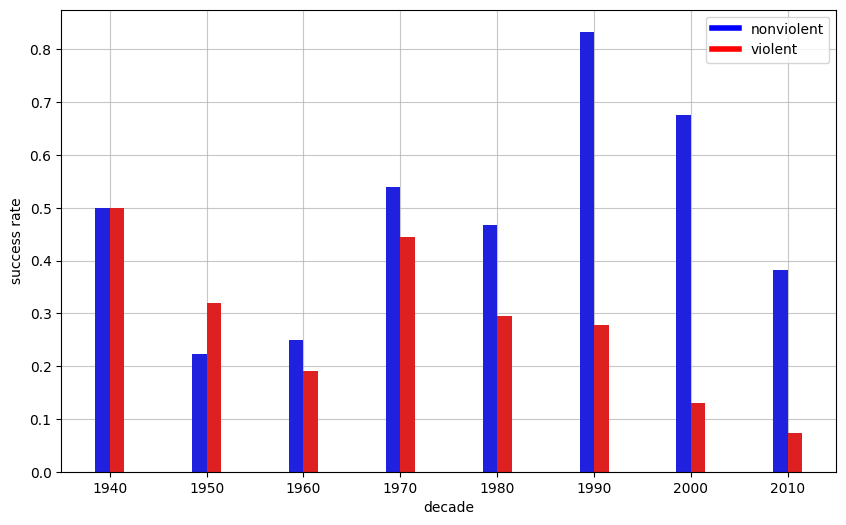

In [170]:
df = pd.read_excel(file_path)
df['Decade'] = (df['EYEAR'] // 10) * 10
df['VIOL'] = df['VIOL'].astype(str)
# Group data by decade and calculate the success rate for violent and nonviolent campaigns
grouped_data = df.groupby(['Decade', 'VIOL']).agg({'SUCCESS': 'mean'}).reset_index()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
bar_width = 0.3
sns.barplot(x='Decade', y='SUCCESS', hue='VIOL', data=grouped_data, palette={'0': 'blue', '1': 'red'},width=bar_width)


ax = plt.subplot()
ax.set_axisbelow(True)
ax.grid(True, linestyle='-', alpha=0.7)

# Set the face color of the plot background to white
ax.patch.set_facecolor('white')
plt.xlabel('decade')
plt.ylabel('success rate')
legend_labels = ['nonviolent', 'violent']
legend_handles = [plt.Line2D([0], [0], color='blue', lw=4),plt.Line2D([0], [0], color='red', lw=4) ]

plt.legend(legend_handles, legend_labels, loc='upper right')
plt.show()


## 2. Largest Resistance Campaigns, 1946-2014

Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%. The plot should look like the one below.

Investigate, outside the largest resistance campaigns, if you can find anything about Greece.

<img src='participation_2pct.svg'>

/var/folders/l7/gyf7bg_n43b1mkt3mqgvyyjh0000gn/T/ipykernel_26143/68812549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resistance['PERCENTAGE'] = (df_resistance['PERCENTAGE POPULAR PARTICIPATION'] * 100).round(2)


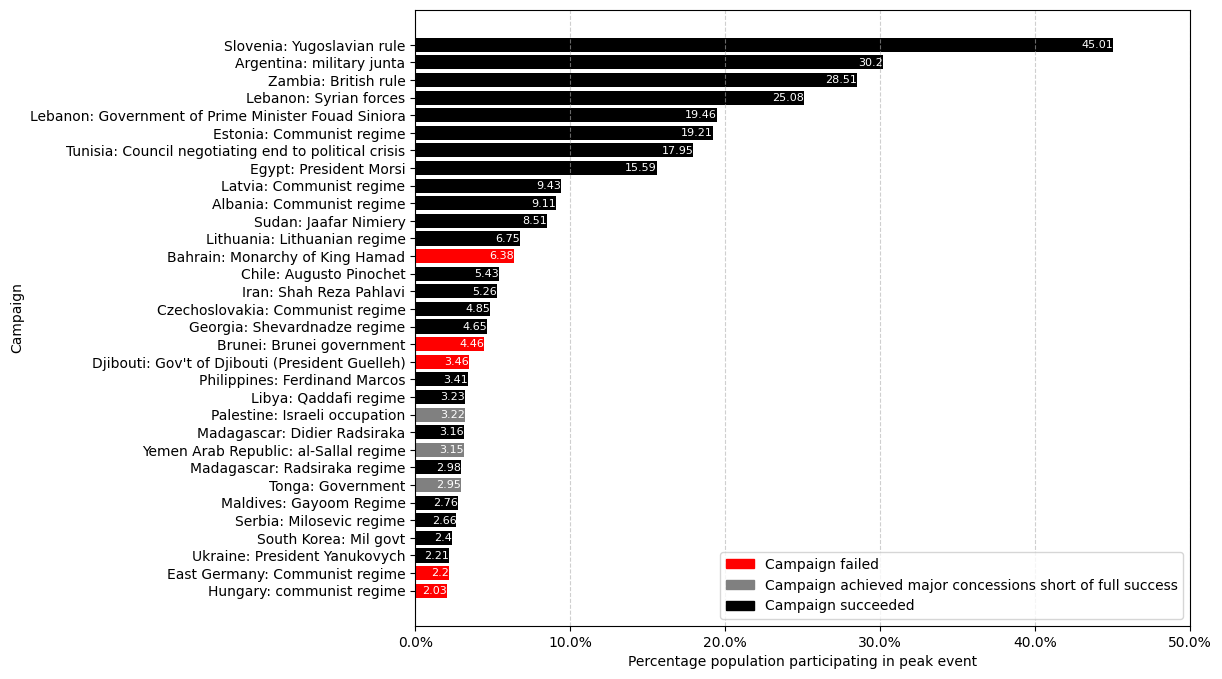

Information about Greece:
    LOCATION             CAMPAIGN
119   Greece      Greek Civil War
120   Greece  Greek anti-military


In [171]:
df = pd.read_excel(file_path)

# Filter resistance campaigns with participation at least 2.0%
df_resistance = df[df['PERCENTAGE POPULAR PARTICIPATION'] >= 0.02]

# Round the percentage of participation to 2 decimals
df_resistance['PERCENTAGE'] = (df_resistance['PERCENTAGE POPULAR PARTICIPATION'] * 100).round(2)

# Sort by percentage of participation in ascending order
sorted_df = df_resistance.sort_values(by='PERCENTAGE', ascending=True)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 8))

# Assign colors based on campaign outcomes
colors = []
for _, row in sorted_df.iterrows():
    if row['FAILURE'] == 1:
        colors.append('red')
    elif row['LIMITED'] == 1:
        colors.append('grey')
    else:
        colors.append('black')

# Plot the horizontal bar chart with annotations and colors
bars = plt.barh(sorted_df['LOCATION'] + ': ' + sorted_df['TARGET'] , sorted_df['PERCENTAGE'], color=colors)


# Annotate the bars with percentages
for bar, percentage in zip(bars, sorted_df['PERCENTAGE']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage}', ha='right', va='center', color='white', fontsize=8)

plt.xlabel('Percentage population participating in peak event')
plt.ylabel('Campaign')


plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='red', label='Campaign failed'),
                    plt.Rectangle((0, 0), 1, 1, color='grey', label='Campaign achieved major concessions short of full success'),
                    plt.Rectangle((0, 0), 1, 1, color='black', label='Campaign succeeded')],
           loc='lower right')
plt.xticks(list(range(0, 51, 10)))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}%'))
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Investigate information about Greece
greece_info = df[df['LOCATION'].str.lower() == 'greece']
print("Information about Greece:")
print(greece_info[['LOCATION', 'CAMPAIGN']])


Greek Civil War

<img src="civil_war.jpg"/>



The Greek Civil War  took place from 1946 to 1949. The conflict, which erupted shortly after the end of World War II, consisted of a communist-dominated uprising against the established government of the Kingdom of Greece. The opposition declared a people's republic, the Provisional Democratic Government of Greece, which was governed by the Communist Party of Greece (KKE) and its military branch, the Democratic Army of Greece (DSE). The rebels were supported by Yugoslavia and the Soviet Union. With the support of the United Kingdom and United States, the Greek government forces ultimately prevailed.

The war had its roots in divisions within Greece during World War II between the communist-dominated left-wing resistance organisation, the EAM-ELAS, and loosely-allied anti-communist resistance forces. It later escalated into a major civil war between the Greek state and the communists. Fighting resulted in the defeat of the DSE by the Hellenic Army.

Greek anti-military

<img src="junta-greece.jpg"/>


The Greek junta or Regime of the Colonels was a right-wing military dictatorship that ruled Greece from 1967 to 1974. On 21 April 1967, a group of colonels overthrew the caretaker government a month before scheduled elections which Georgios Papandreou's Centre Union was favoured to win.

The dictatorship was characterised by policies such as anti-communism, restrictions on civil liberties, and the imprisonment, torture, and exile of political opponents. It was ruled by Georgios Papadopoulos from 1967 to 1973, but an attempt to renew its support in a 1973 referendum on the monarchy and gradual democratisation was ended by another coup by the hardliner Dimitrios Ioannidis, who ruled it until it fell on 24 July 1974 under the pressure of the Turkish invasion of Cyprus, leading to the Metapolitefsi ("regime change") (Greek: Μεταπολίτευση) to democracy and the establishment of the Third Hellenic Republic. It has been said to have been heavily influenced by the CIA.

## 3. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis. Your plot should look like the following; explain it as best you can.

<img src="fig_4.svg" />

Then, do the same but with only the membership per capital as dependent variable. Your plot should look like this (explain why is this different than the previous one):

<img src="fig_5.svg" />

In [29]:
df = pd.read_excel(file_path)
# df.dropna(inplace=True)

df['POPULATION'] = np.log(df['PARTICIPATION'] / df['PERCENTAGE POPULAR PARTICIPATION'])
df['LOG_POP'] = df['POPULATION'].apply(lambda x: 0 if x == 0 else x)
df['LOG_PARTICIPATION_PER_CAPITA'] = np.log(df['PARTICIPATION']) / df['POPULATION']
# x_values = np.linspace(df['LOG_PARTICIPATION_PER_CAPITA'].min(), df['LOG_PARTICIPATION_PER_CAPITA'].max(), 100)
# print(x_values)

# Logistic regression model with formula
formula = 'SUCCESS ~ LOG_PARTICIPATION_PER_CAPITA + LOG_POP'
model = smf.logit(formula=formula, data=df)
result = model.fit()

# Print regression summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1297
Time:                        13:57:53   Log-Likelihood:                -220.69
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 5.189e-15
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.8142      1.496     -1.881      0.060

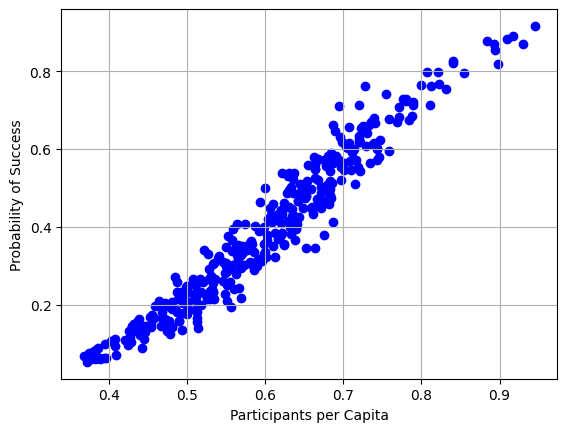

In [30]:
# Predicted probabilities
df['predicted_prob'] = result.predict(df)

#scatter plot
plt.scatter(df['LOG_PARTICIPATION_PER_CAPITA'], df['predicted_prob'], color='blue', marker='o')
plt.xlabel('Participants per Capita')
plt.ylabel('Probability of Success')
plt.grid()
plt.show()

In [31]:
df = pd.read_excel(file_path)
# df.dropna(inplace=True)

df['POPULATION'] = np.log(df['PARTICIPATION'] / df['PERCENTAGE POPULAR PARTICIPATION'])
df['LOG_PARTICIPATION_PER_CAPITA'] = np.log(df['PARTICIPATION']) / df['POPULATION']

# Logistic regression model with formula
formula = 'SUCCESS ~ LOG_PARTICIPATION_PER_CAPITA'
model = smf.logit(formula=formula, data=df)
result = model.fit()

# Print regression summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1225
Time:                        13:59:04   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -5.3469      0.709     -7.536      0.000

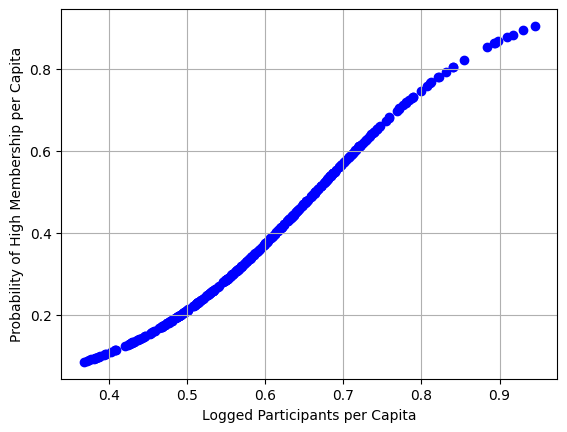

In [32]:

# Predicted probabilities
df['predicted_prob'] = result.predict(df)

# Create scatter plot
plt.scatter(df['LOG_PARTICIPATION_PER_CAPITA'], df['predicted_prob'], color='blue', marker='o')
plt.xlabel('Logged Participants per Capita')
plt.ylabel('Probability of High Membership per Capita')
plt.grid()
plt.show()

RESULTS

Since P-value for LOG_PARTICIPATION_PER_CAPITA equals 0.000 it suggests that there is a statistically significant relationship between LOG_PARTICIPATION_PER_CAPITA and the dependent variable (SUCCESS). The second curve is more compact since it is influenced only by LOG_PARTICIPATION_PER_CAPITA, whereas the first one is affected by both LOG_PARTICIPATION_PER_CAPITA and LOG_POP. In both cases, LOG_PARTICIPATION_PER_CAPITA significantly impacts the outcome.

## 4. The Level of Participation Tipping Point

As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.

Based on your data, create a table like the one below and explain how Chenoweth came up with the rule.

<table>
<thead>
<tr><th>Peak Popular Participation (%)  </th><th style="text-align: right;">  Observations</th><th>Success Rate  </th></tr>
</thead>
<tbody>
<tr><td>greater than 3.5%               </td><td style="text-align: right;">            18</td><td>88.89%        </td></tr>
<tr><td>1.0% - 3.5%                     </td><td style="text-align: right;">            41</td><td>60.98%        </td></tr>
<tr><td>0.25% - 1.0%                    </td><td style="text-align: right;">            92</td><td>45.65%        </td></tr>
<tr><td>0.06% - 0.25%                   </td><td style="text-align: right;">            95</td><td>45.26%        </td></tr>
<tr><td>0.015% - 0.06%                  </td><td style="text-align: right;">            66</td><td>24.24%        </td></tr>
<tr><td>0.0035% - 0.015%                </td><td style="text-align: right;">            44</td><td>9.09%         </td></tr>
<tr><td>less than 0.0035%               </td><td style="text-align: right;">            24</td><td>4.17%         </td></tr>
</tbody>
</table>

Apart from the way Chenoweth came up with the rule, we can derive it in more statistically-based way.  From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign with 99% probability.

In [178]:
df = pd.read_excel(file_path)

# Define bins for percentage popular participation
bins = [0.0001, 0.0035, 0.015, 0.06, 0.25, 1.0, 3.5, float('inf')]
labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']

# Create a new column for binning
df['Category'] = pd.cut(df['PERCENTAGE POPULAR PARTICIPATION'] * 100, bins=bins, labels=labels, right=False)

# Group by the bins and calculate the success rate and observations
result_table = df.groupby('Category').agg(
    Observations=('PERCENTAGE POPULAR PARTICIPATION', 'count'),
    Success_Rate=('SUCCESS', 'mean')
).reset_index()

result_table.columns = ['Peak Popular Participation (%)', 'Observations', 'Success Rate']

result_table['Success Rate'] = (result_table['Success Rate'] * 100).round(2).astype(str) + '%'

# Sort the result table 
result_table = result_table.sort_values(by='Peak Popular Participation (%)', ascending=False).reset_index(drop=True)

print(result_table)


  Peak Popular Participation (%)  Observations Success Rate
0              greater than 3.5%            18       88.89%
1                    1.0% - 3.5%            41       60.98%
2                   0.25% - 1.0%            92       45.65%
3                  0.06% - 0.25%            95       45.26%
4                 0.015% - 0.06%            66       24.24%
5               0.0035% - 0.015%            44        9.09%
6              less than 0.0035%            24        4.17%


/var/folders/l7/gyf7bg_n43b1mkt3mqgvyyjh0000gn/T/ipykernel_26143/4241745426.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_table = df.groupby('Category').agg(


Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6
Most Extreme Probability Point:
NAVCO ID                                               205
CAMPAIGN                            Slovenian independence
LOCATION                                          Slovenia
BYEAR                                                 1990
EYEAR                                                 1991
TARGET                                    Yugoslavian rule
SUCCESS                                                  1
LIMITED                                                  0
FAILURE                                                  0
ONGOING                                                  0
NONVIOL                                                  1
VIOL                                                     0
REGCHANGE                                                0
FSELFDET                                                 0
SECESSION                               

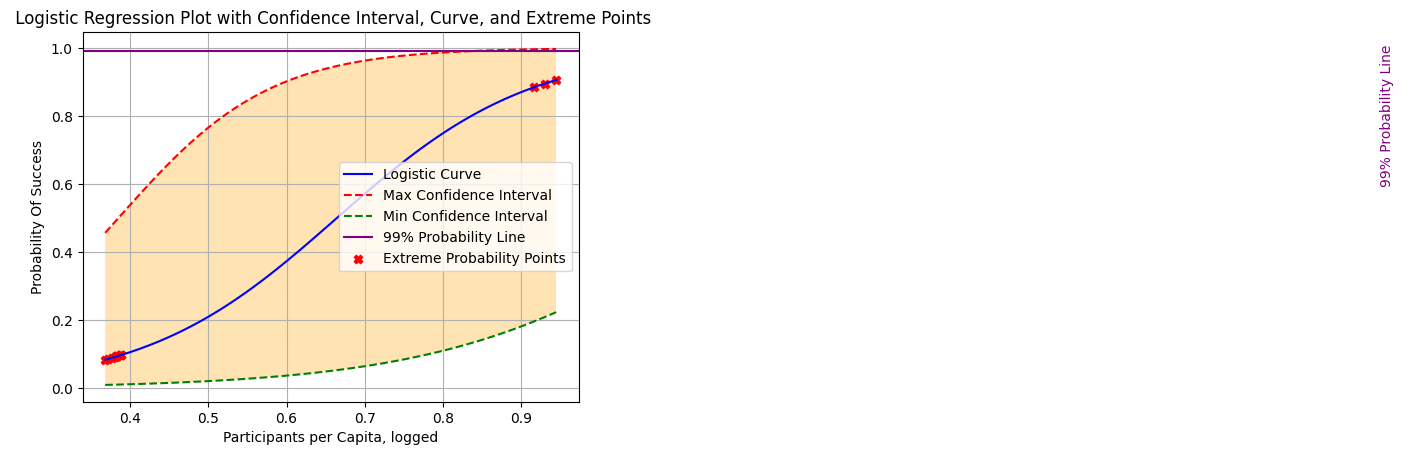

In [179]:
df = pd.read_excel(file_path)

df['POPULATION'] = np.log(df['PARTICIPATION'] / df['PERCENTAGE POPULAR PARTICIPATION'])
df['LOG_PARTICIPATION_PER_CAPITA'] = np.log(df['PARTICIPATION']) / df['POPULATION']

def sig(x, m, c):
    return 1 / (1 + np.exp(-(m * x + c)))

def logistic_curve(x, params):
    m, c = params['LOG_PARTICIPATION_PER_CAPITA'], params['Intercept']
    return sig(x, m, c)

#confidence interval lines
def sig_confidence_interval(x, params, conf_int):
    min_partic_per_capita, max_partic_per_capita = conf_int.loc['LOG_PARTICIPATION_PER_CAPITA']
    Intercept_min, Intercept_max = conf_int.loc['Intercept']
    
    y_val_max = sig(x, max_partic_per_capita, Intercept_max)
    y_val_min = sig(x, min_partic_per_capita, Intercept_min)
    
    return y_val_max, y_val_min

#formula and fit of the logistic regression model
formula = 'SUCCESS ~ LOG_PARTICIPATION_PER_CAPITA'
model = smf.logit(formula=formula, data=df)
result = model.fit()

# Generate x values for the plot
x_values = np.linspace(df['LOG_PARTICIPATION_PER_CAPITA'].min(), df['LOG_PARTICIPATION_PER_CAPITA'].max(), 100)

#logistic curve and confidence interval
logistic_curve_values = logistic_curve(x_values, result.params)
y_val_max, y_val_min = sig_confidence_interval(x_values, result.params, result.conf_int())

fig, ax = plt.subplots()
ax.plot(x_values, logistic_curve_values, color='blue', linestyle='-', label='Logistic Curve')
#lines for max and min confidence intervals
ax.plot(x_values, y_val_max, linestyle='--', color='red', label='Max Confidence Interval')
ax.plot(x_values, y_val_min, linestyle='--', color='green', label='Min Confidence Interval')

polygon_points = [(x, y) for x, y in zip(x_values, y_val_min)] + [(x, y) for x, y in zip(x_values[::-1], y_val_max[::-1])]
polygon = Polygon(polygon_points, closed=True, facecolor='orange', alpha=0.3, edgecolor='none')


ax.add_patch(polygon)


#line where the probability of success is 99%
plt.axhline(y=0.99, color='purple', linestyle='-', label='99% Probability Line')

plt.text(2, 0.6, '99% Probability Line', rotation=90, color='purple')

# extreme points on the logistic curve
extreme_prob_points = df[(df['SUCCESS'] == 0) & (result.predict(df) < 0.1) | (df['SUCCESS'] == 1) & (result.predict(df) > 0.88)]
plt.scatter(extreme_prob_points['LOG_PARTICIPATION_PER_CAPITA'], result.predict(extreme_prob_points), color='red', marker='X', label='Extreme Probability Points')
most_extreme_point = extreme_prob_points.loc[result.predict(extreme_prob_points).idxmax()]

# Print the row with the most extreme probability point
print("Most Extreme Probability Point:")
print(most_extreme_point)

# Extract the x-value for the most extreme probability point
x_value_most_extreme = most_extreme_point['LOG_PARTICIPATION_PER_CAPITA']
print(f"\nX-value for the Most Extreme Probability Point: {x_value_most_extreme}")

plt.xlabel('Participants per Capita, logged')
plt.ylabel('Probability Of Success')
plt.title(' Logistic Regression Plot with Confidence Interval, Curve, and Extreme Points')
plt.grid()
plt.legend()
plt.show()


In [180]:
# Generate LOG_PARTICIPATION_PER_CAPITA (MEMPC) values for the plot
x_values_cont = np.linspace(df['LOG_PARTICIPATION_PER_CAPITA'].min(), df['LOG_PARTICIPATION_PER_CAPITA'].max(), 100)

# Calculate the logistic curve and confidence interval
logistic_curve_values = sig(x_values_cont, result.params['LOG_PARTICIPATION_PER_CAPITA'], result.params['Intercept'])
y_values_max, y_values_min = sig_confidence_interval(x_values_cont, result.params, result.conf_int())

# Find MEMPC for which the logistic curve crosses the 0.99 probability threshold in the max confidence interval
mempc = x_values_cont[np.argmax(y_values_max >= 0.99)]
result2 = df[df['LOG_PARTICIPATION_PER_CAPITA'] >= 0.83]['PERCENTAGE POPULAR PARTICIPATION']

print(f"MEMPC for 0.99 Probability in Max Confidence Interval: {mempc}")
print(result2)


MEMPC for 0.99 Probability in Max Confidence Interval: 0.8341953978880616
4      0.091068
14     0.302013
98     0.155889
104    0.192146
158    0.052632
187    0.094319
192    0.250824
194    0.194598
295    0.450129
314    0.085106
342    0.179470
384    0.285063
Name: PERCENTAGE POPULAR PARTICIPATION, dtype: float64


In [65]:
smallest_value = result2.min()
print(f"Smallest value in result2: {smallest_value}")

Smallest value in result2: 0.05263157894736842


In [66]:
result2 = df[df['LOG_PARTICIPATION_PER_CAPITA'] >= 0.81]['PERCENTAGE POPULAR PARTICIPATION']
smallest_value = result2.min()
print(f"Smallest value in result2: {smallest_value}")

Smallest value in result2: 0.034129692832764506


We note that for 0.83 the smallest percentage we get is 5.2%
The closest to 3.5% is for 0.81 where we get 3.4%
Based on the table in question 4.1 we observe that for > 3.5 we get a success rate of 88.89%, 
therefore as 5.2 exceeds 3.5% it is logical to increase with the success rate reaching  99%.

## 5. Nonviolent Resistance and Target Regime Type

Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.


In [181]:


# Load the datasets
df1 = pd.read_excel(file_path5)
df2 = pd.read_excel(file_path)

# Merge the datasets based on 'year' and 'country'
merged_df = pd.merge(df1, df2, how='inner', left_on=['year', 'country'], right_on=['BYEAR', 'LOCATION'])
merged_df.drop_duplicates(subset=['LOCATION','EYEAR'])
merged_df['log_participation'] = np.log(merged_df['PARTICIPATION'])
merged_df['POPULATION'] = np.log(merged_df['PARTICIPATION'] / merged_df['PERCENTAGE POPULAR PARTICIPATION'])
merged_df['LOG_POP'] = merged_df['POPULATION'].apply(lambda x: 0 if x == 0 else x)
log_mod = smf.logit(formula='SUCCESS ~ NONVIOL + polity + log_participation + LOG_POP', data=merged_df).fit()
log_mod.summary()


Optimization terminated successfully.
         Current function value: 0.542967
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  294
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1787
Time:                        23:37:14   Log-Likelihood:                -159.63
converged:                       True   LL-Null:                       -194.37
Covariance Type:            nonrobust   LLR p-value:                 2.925e-14
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9242      1.543      0.599      0.549      -2.101       3.949
NONVIOL               1.0489      0.296      3.547      0.000       0.469       1.628
polity               -0.0078      0.005     -1.602      0.109      -0.017       0.002
log_participation     0.4008      0.088      4.555      0.000       0.228       0.573
LOG_POP              -0.3652      0.101     -3.598      0.000      -0.564      -0.166
=====================================================================================
"""

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, on ChatGPT, Bard, or Bing, by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your fellow students in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.